In [1]:
# PErformances estimation with cross-validation

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
# rotation and dilatation matrices
rot = np.array([[0.94, -0.34], [0.34, 0.94]])
sca = np.array([[3.4, 0], [0, 2]])

In [4]:
# Generate class 1 points
np.random.seed(150)
c1d = (np.random.randn(400,2)).dot(sca).dot(rot)

In [5]:
# Generate class 2 points
c2d1 = np.random.randn(100,2)+[-10, 2]
c2d2 = np.random.randn(100,2)+[-7, -2]
c2d3 = np.random.randn(100,2)+[-2, -6]
c2d4 = np.random.randn(100,2)+[5, -7]

In [6]:
data = np.concatenate((c1d, c2d1, c2d2, c2d3, c2d4))

In [7]:
# Generate the labels
l1c = np.ones(400, dtype=int)
l2c = np.zeros(400, dtype=int)
labels = np.concatenate((l1c, l2c))

In [8]:
# Split on training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.5)

In [9]:
X_train.shape

(400, 2)

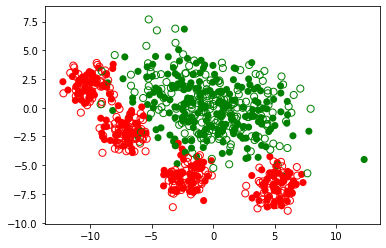

In [10]:
# Display points
plt.figure()
cmp = np.array(['r','g'])
plt.scatter(X_train[:,0],X_train[:,1],c=cmp[y_train],s=50,edgecolors='none')
plt.scatter(X_test[:,0],X_test[:,1],c='none',s=50,edgecolors=cmp[y_test])

In [13]:
# K- fold
# Using PMC
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1)

# KFold for different values of k
from sklearn.model_selection import KFold
# valeurs de k
kcvfs = np.array([2, 3, 5, 7, 10, 13, 16, 20, 40, 100])
# préparation des listes pour stocker les résultats
scores = list()
scores_std = list()

for kcvf in kcvfs:    # pour chaque valeur de k
    kf = KFold(n_splits=kcvf, shuffle=True)
    scores_kf = list()
    # apprentissage puis évaluation d'un modèle sur chaque split
    for train_idx, test_idx in kf.split(X_train):
        clf.fit(X_train[train_idx], y_train[train_idx])
        scores_kf.append(clf.score(X_train[test_idx], y_train[test_idx]))
    # calcul de la moyenne et de l'écart-type des performances obtenues
    scores.append(np.mean(scores_kf))
    scores_std.append(np.std(scores_kf))

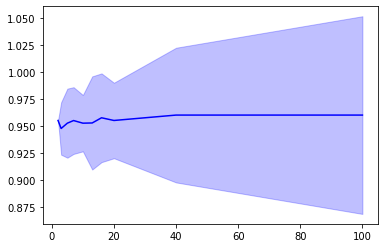

In [14]:
# Display results 

scores, scores_std = np.array(scores), np.array(scores_std)

# affichage performance moyenne +- 1 écart-type pour chaque k
plt.figure()
plt.plot(kcvfs, scores, 'b')
plt.fill_between(kcvfs, scores-scores_std, scores+scores_std, color='blue', alpha=0.25)

In [15]:
# K- fold
# Using PMC
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1)

# KFold for different values of k
from sklearn.model_selection import KFold
# valeurs de k
kcvfs = np.array([2, 3, 5, 7, 10, 13, 16, 20])
# préparation des listes pour stocker les résultats
scores = list()
scores_std = list()
scores_test_mean = list()
scores_test_std = list()

for kcvf in kcvfs:    # pour chaque valeur de k
    kf = KFold(n_splits=kcvf, shuffle=True)
    scores_kf = list()
    scores_test = list()
    # apprentissage puis évaluation d'un modèle sur chaque split
    for train_idx, test_idx in kf.split(X_train):
        clf.fit(X_train[train_idx], y_train[train_idx])
        scores_kf.append(clf.score(X_train[test_idx], y_train[test_idx]))
        scores_test.append(clf.score(X_test, y_test))
    # calcul de la moyenne et de l'écart-type des performances obtenues
    scores.append(np.mean(scores_kf))
    scores_std.append(np.std(scores_kf))   
    scores_test_mean.append(np.mean(scores_test))

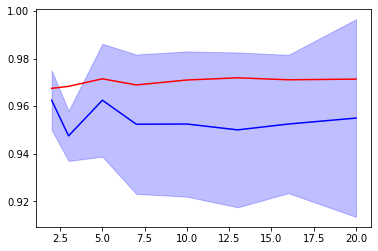

In [16]:
# Display results 

scores, scores_std = np.array(scores), np.array(scores_std)
scores_t = np.array(scores_test_mean)
# affichage performance moyenne +- 1 écart-type pour chaque k
plt.figure()
plt.plot(kcvfs, scores, 'b')
plt.fill_between(kcvfs, scores-scores_std, scores+scores_std, color='blue', alpha=0.25)
plt.plot(kcvfs, scores_t, 'r')

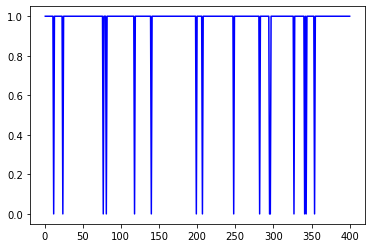

In [30]:
# Leave One out
# Using PMC
from sklearn.model_selection import LeaveOneOut
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(solver='lbfgs', alpha=1)

# KFold for different values of k
from sklearn.model_selection import KFold

# préparation des listes pour stocker les résultats
loo = LeaveOneOut()
scores_loo = list()
# apprentissage puis évaluation d'un modèle sur chaque split
for train_idx, test_idx in loo.split(X_train):
    clf.fit(X_train[train_idx], y_train[train_idx])
    scores_loo.append(clf.score(X_train[test_idx], y_train[test_idx]))
       
# Display results 
scores = np.array(scores_loo)
# affichage performance moyenne +- 1 écart-type pour chaque k
plt.figure()
plt.plot([i for i in range(1, X_train.shape[0] + 1)], scores, 'b')


In [31]:
# Search of hyper param

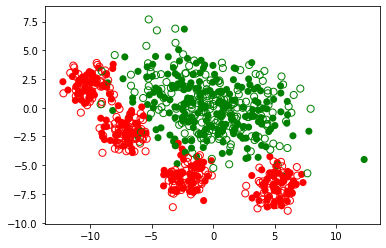

In [32]:
# définir matrices de rotation et de dilatation
rot = np.array([[0.94, -0.34], [0.34, 0.94]])
sca = np.array([[3.4, 0], [0, 2]])

# générer données classe 1
np.random.seed(150)
c1d = (np.random.randn(400,2)).dot(sca).dot(rot)

# générer données classe 2
c2d1 = np.random.randn(100,2)+[-10, 2]
c2d2 = np.random.randn(100,2)+[-7, -2]
c2d3 = np.random.randn(100,2)+[-2, -6]
c2d4 = np.random.randn(100,2)+[5, -7]
data = np.concatenate((c1d, c2d1, c2d2, c2d3, c2d4))

# générer étiquettes de classe
l1c = np.ones(400, dtype=int)
l2c = np.zeros(400, dtype=int)
labels = np.concatenate((l1c, l2c))

# découpage initial en données d'apprentissage et données de test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.5)

# affichage des données d'apprentissage et de test
cmp = np.array(['r','g'])
plt.figure()
plt.scatter(X_train[:,0],X_train[:,1],c=cmp[y_train],s=50,edgecolors='none')
plt.scatter(X_test[:,0],X_test[:,1],c='none',s=50,edgecolors=cmp[y_test])

In [33]:
from sklearn.model_selection import GridSearchCV